In [6]:
import cvxpy as cvx
import numpy as np
import pandas as pd
import time
from pathlib import Path

import matplotlib.pyplot as plt

In [7]:
import os
from zipline.data import bundles

In [8]:
current_dir = Path('.')
current_dir.absolute()

WindowsPath('G:/My Drive/Slate/Notes_G/Finance Job/python for finance')

In [9]:
df = pd.read_csv(current_dir.absolute() / 'quotemedia_data_May31.csv', header=[0, 1])
df.columns = [f'{col[0]}_{col[1]}' for col in df.columns]
df.drop(0, inplace=True)
df.rename(columns={'Price_Ticker' : 'Date'}, inplace=True)
df.head()

,Date,Adj Close_A,Adj Close_AAL,Adj Close_AAP,Adj Close_AAPL,Adj Close_ABBV,Adj Close_ABC,Adj Close_ABT,Adj Close_ACN,Adj Close_ADBE,...,Volume_XL,Volume_XLNX,Volume_XOM,Volume_XRAY,Volume_XRX,Volume_XYL,Volume_YUM,Volume_ZBH,Volume_ZION,Volume_ZTS
1,2013-07-01,28.463699,15.838058,74.229591,12.621668,26.622534,NaN,28.366257,59.305653,46.240002,...,NaN,NaN,13182200.0,684100.0,2170247.0,1479900.0,3013045.0,1260411.0,1440600.0,17601000.0
2,2013-07-02,28.137201,15.489241,73.848862,12.907585,27.006422,NaN,28.228590,59.322105,46.029999,...,NaN,NaN,12320700.0,894500.0,2358706.0,1432800.0,3218635.0,1230232.0,2435600.0,11157300.0
3,2013-07-03,28.189438,15.790919,74.320206,12.978834,27.019215,NaN,27.734631,59.782722,46.419998,...,NaN,NaN,5674000.0,809200.0,1817919.0,330300.0,2560414.0,506142.0,1828900.0,12930000.0
4,2013-07-05,28.881617,15.875768,74.855049,12.874584,27.332724,NaN,28.277182,60.572376,47.000000,...,NaN,NaN,8917900.0,572500.0,2426106.0,570100.0,2127256.0,441973.0,2995500.0,10819200.0
5,2013-07-08,28.966501,15.970046,75.888367,12.801483,27.946947,NaN,28.673977,61.255081,46.630001,...,NaN,NaN,12086700.0,491600.0,2372255.0,759400.0,3477917.0,895173.0,2645000.0,15675100.0


In [10]:
adj_close_cols = [col for col in df.columns if 'Adj Close' in col]
df_adj_close = df[adj_close_cols]
df_adj_close = df_adj_close.dropna(axis=1, how='all')
df_adj_close.shape

(1008, 426)

In [11]:
df_adj_close.to_csv(current_dir.absolute() / 'df_adj_close.csv')

# Zipline - Reloaded

## Command Line Interface (CLI)

* Before we can run the algorithm, we'll need some historical data for our algorithm to ingest, which we can get through a data bundle. 
* A data bundle is a collection of pricing data, adjustment data, and an asset database.
* Bundles allow us to preload all of the data we will need to run backtests and store the data for future runs.
* Quantopian provides a default bundle called quandl which uses the Quandl WIKI Dataset.
* You'll need a Quandl API Key, and then you can ingest that data by running:

In [12]:
from zipline.examples import buyapple


Each period, which is a trading day, 
* it orders 10 shares of the Apple stock and records the price.

In [13]:
from zipline.api import order, record, symbol

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), 'price'))

* first have to import some functions we would like to use. 
* All functions commonly used in your algorithm can be found in zipline.api. 
* Here we are using order() which takes two arguments: a security object, and 
    * a number specifying how many stocks you would like to order 
        * (if negative, order() will sell/short stocks). 
    * In this case we want to order 10 shares of Apple at each iteration.

* Finally, the record() function allows you to save the value of a variable at each iteration. 
* You provide it with a name for the variable together with the variable itself: varname=var. 
* After the algorithm finished running you will have access to each variable value 
    * you tracked with record() under the name you provided (we will see this further below). 
* You also see how we can access the current price data of the AAPL stock in the data event frame.

```$ zipline ingest -b <bundle>```


Ingesting Data

* where <bundle> is the name of the bundle to ingest. 
* You can use the default quandl for now to work with the Quandl WIKI price data.

In [14]:
%matplotlib inline
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


Important Arguments

* `-f` : Location of The file that contains the algorithm to run.
* date range to run the algorithm over (`--start` and `--end`).
* To use a benchmark, you need to choose one of the benchmark options listed before.
    * You can always use the option (--no-benchmark) that uses zero returns as a benchmark
        * ( alpha, beta and benchmark metrics are not calculated in this case).
* Finally, you’ll want to save the performance metrics of your algorithm so that you can analyze how it performed.
* This is done via the `--output` flag and will cause it to write the performance DataFrame in the pickle Python file format.
* Note that you can also define a configuration file with these parameters that you can then conveniently pass to the `-c` option so that you don’t have to supply the command line args all the time (see the .conf files in the examples directory).
* Thus, to execute our algorithm from above and save the results to `buyapple_out.pickle`, we call `zipline run`.

In [15]:
!zipline run -f ./buyapple.py --start 2016-1-1 --end 2018-1-1 -o buyapple_out.pickle --no-benchmark


Figure(1800x800)


C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
[2024-06-15T17:14:21-0400-INFO][zipline.finance.metrics.tracker]
 Simulated 503 trading days
 first open: 2016-01-04 14:30:00+00:00
 last close: 2017-12-29 21:00:00+00:00


```
from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), "price"))
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()
```

* run first calls the `initialize()` function, and 
* then streams the historical stock price day-by-day through `handle_data()`.
* After each call to `handle_data()` we instruct zipline to order 10 stocks of AAPL. 
* After the call of the `order()` function, zipline enters the ordered stock and amount in the order book. 
* After the `handle_data()` function has finished, 
    * zipline looks for any open orders and tries to fill them. 
* If the trading volume is high enough for this stock, 
    * the order is executed after adding the commission and applying the slippage model 
    * which models the influence of your order on the stock price, 
    * so your algorithm will be chrged more than just the stock price * 10. 
        * Note, that you can also change the commission and slippage model that zipline uses.

In [16]:
import pandas as pd
perf = pd.read_pickle('buyapple_out.pickle') # read in perf DataFrame
perf.head()

,period_open,period_close,long_exposure,short_value,long_value,returns,ending_cash,starting_cash,ending_value,pnl,...,treasury_period_return,benchmark_period_return,benchmark_volatility,excess_return,max_leverage,max_drawdown,sortino,sharpe,alpha,beta
2016-01-04 21:00:00+00:00,2016-01-04 14:31:00+00:00,2016-01-04 21:00:00+00:00,0.0,0.0,0.0,0.000000e+00,10000000.0,10000000.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.000000,0.000000e+00,NaN,NaN,None,None
2016-01-05 21:00:00+00:00,2016-01-05 14:31:00+00:00,2016-01-05 21:00:00+00:00,1027.1,0.0,1027.1,-1.000000e-07,9998971.9,10000000.0,1027.1,-1.0,...,0.0,0.0,0.0,0.0,0.000103,-1.000000e-07,-11.224972,-11.224972,None,None
2016-01-06 21:00:00+00:00,2016-01-06 14:31:00+00:00,2016-01-06 21:00:00+00:00,2014.0,0.0,2014.0,-2.110000e-06,9997963.9,9998971.9,2014.0,-21.1,...,0.0,0.0,0.0,0.0,0.000201,-2.210000e-06,-9.588756,-9.823839,None,None
2016-01-07 21:00:00+00:00,2016-01-07 14:31:00+00:00,2016-01-07 21:00:00+00:00,2893.5,0.0,2893.5,-8.600019e-06,9996998.4,9997963.9,2893.5,-86.0,...,0.0,0.0,0.0,0.0,0.000289,-1.081000e-05,-9.688947,-10.592737,None,None
2016-01-08 21:00:00+00:00,2016-01-08 14:31:00+00:00,2016-01-08 21:00:00+00:00,3878.4,0.0,3878.4,1.430015e-06,9996027.8,9996998.4,3878.4,14.3,...,0.0,0.0,0.0,0.0,0.000388,-1.081000e-05,-7.519659,-7.511729,None,None


In [18]:
perf['AAPL'].head()

2016-01-04 21:00:00+00:00    105.35
2016-01-05 21:00:00+00:00    102.71
2016-01-06 21:00:00+00:00    100.70
2016-01-07 21:00:00+00:00     96.45
2016-01-08 21:00:00+00:00     96.96
Name: AAPL, dtype: float64

In [19]:
'price' in perf.columns

False

* Let’s take a quick look at the performance DataFrame.
* For this, we use pandas from inside the IPython Notebook and print the first ten rows.
* As you can see, there is a row for each trading day, starting on the first business day of 2016.
* In the columns you can find various information about the state of your algorithm.
* The very first column AAPL was placed there by the record() function mentioned earlier and allows us to plot the price of apple.
* For example, we could easily examine now how our portfolio value changed over time compared to the AAPL stock price.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['record']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<Axes: >

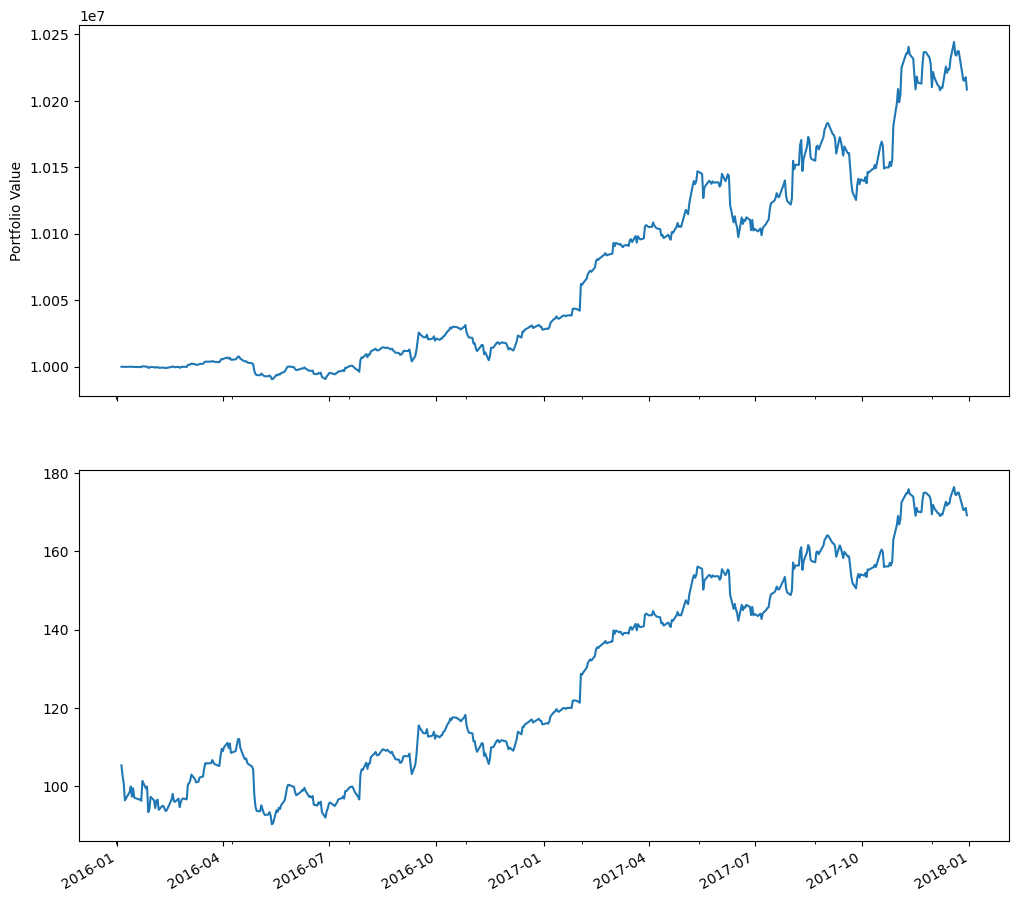

In [42]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
perf.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('Portfolio Value')
ax2 = plt.subplot(212, sharex=ax1)
perf.AAPL.plot(ax=ax2)

## Jupyter notebook

Zipline provides an easy way to run your algorithm inside the Notebook without requiring you to use the CLI.

* To use it you have to write your algorithm in a cell and let Zipline know that it is supposed to run this algorithm. * This is done via the `%%zipline` IPython magic command that is available after you import zipline from within the IPython Notebook.
* This magic takes the same arguments as the command line interface described above.
* Thus to run the algorithm from above with the same parameters we just have to execute the following cell after importing zipline to register the magic.

In [43]:
%load_ext zipline


The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


* Note that we did not have to specify an input file as above since the magic will use the contents of the cell and look for your algorithm functions there.
* Also, instead of defining an output file we are specifying a variable name with `-o` that will be created in the name space and contain the performance DataFrame we looked at above.

In [44]:
%%zipline --start 2017-1-1 --end 2018-1-1 --no-benchmark -o dma.pickle

from zipline.api import symbol, order, record

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), "price"))

C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns


,period_open,period_close,long_value,short_value,long_exposure,pnl,short_exposure,capital_used,orders,transactions,...,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algorithm_period_return
2017-01-03 21:00:00+00:00,2017-01-03 14:31:00+00:00,2017-01-03 21:00:00+00:00,0.0,0.0,0.0,0.00000,0.0,0.00000,"[{'id': '5f06d0ed3cb544d38cb3608b10c8338d', 'd...",[],...,None,NaN,NaN,0.000000e+00,0.000000,0.0,0.0,1,2017-01,0.000000e+00
2017-01-04 21:00:00+00:00,2017-01-04 14:31:00+00:00,2017-01-04 21:00:00+00:00,1160.2,0.0,1160.2,-0.59010,0.0,-1160.79010,"[{'id': '5f06d0ed3cb544d38cb3608b10c8338d', 'd...","[{'amount': 10, 'dt': 2017-01-04 21:00:00+00:0...",...,None,-11.224972,-11.224972,-5.901000e-08,0.000116,0.0,0.0,2,2017-01,-5.901000e-08
2017-01-05 21:00:00+00:00,2017-01-05 14:31:00+00:00,2017-01-05 21:00:00+00:00,2332.2,0.0,2332.2,5.30695,0.0,-1166.69305,"[{'id': '69a8ab569c1b4aeaa6fa6a6be7a6e89b', 'd...","[{'amount': 10, 'dt': 2017-01-05 21:00:00+00:0...",...,None,7.685091,73.259866,-5.901000e-08,0.000233,0.0,0.0,3,2017-01,4.716850e-07
2017-01-06 21:00:00+00:00,2017-01-06 14:31:00+00:00,2017-01-06 21:00:00+00:00,3537.3,0.0,3537.3,25.40045,0.0,-1179.69955,"[{'id': '5bfb2f2228f84a648d907ebc09f00678', 'd...","[{'amount': 10, 'dt': 2017-01-06 21:00:00+00:0...",...,None,9.792562,405.098399,-5.901000e-08,0.000354,0.0,0.0,4,2017-01,3.011730e-06
2017-01-09 21:00:00+00:00,2017-01-09 14:31:00+00:00,2017-01-09 21:00:00+00:00,4759.6,0.0,4759.6,31.79505,0.0,-1190.50495,"[{'id': '3f445a715476479a911c06afa8d764f9', 'd...","[{'amount': 10, 'dt': 2017-01-09 21:00:00+00:0...",...,None,12.975325,744.845484,-5.901000e-08,0.000476,0.0,0.0,5,2017-01,6.191235e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,430524.6,0.0,430524.6,-0.88505,0.0,-1750.98505,"[{'id': '5b67c14cd90a4c2d85329961ddd5745b', 'd...","[{'amount': 10, 'dt': 2017-12-22 21:00:00+00:0...",...,None,1.515380,2.433444,-2.376199e-03,0.042794,0.0,0.0,247,2017-12,6.042334e-03
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,421307.9,0.0,421307.9,-10923.26285,0.0,-1706.56285,"[{'id': '58e1e5d7904b4da9a182cf71648c366f', 'd...","[{'amount': 10, 'dt': 2017-12-26 21:00:00+00:0...",...,None,1.195394,1.827033,-2.376199e-03,0.042794,0.0,0.0,248,2017-12,4.950008e-03
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,423088.0,0.0,423088.0,73.23700,0.0,-1706.86300,"[{'id': 'dfbee5cb6233442c8e02273c950f5786', 'd...","[{'amount': 10, 'dt': 2017-12-27 21:00:00+00:0...",...,None,1.194753,1.826047,-2.376199e-03,0.042794,0.0,0.0,249,2017-12,4.957332e-03
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,425989.2,0.0,425989.2,1189.53460,0.0,-1711.66540,"[{'id': 'a4568d3b17064c0b8b8ded2733dfb8de', 'd...","[{'amount': 10, 'dt': 2017-12-28 21:00:00+00:0...",...,None,1.220521,1.865935,-2.376199e-03,0.042794,0.0,0.0,250,2017-12,5.076285e-03


In [45]:
df = pd.read_pickle('dma.pickle')
df.head()

,period_open,period_close,long_value,short_value,long_exposure,pnl,short_exposure,capital_used,orders,transactions,...,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algorithm_period_return
2017-01-03 21:00:00+00:00,2017-01-03 14:31:00+00:00,2017-01-03 21:00:00+00:00,0.0,0.0,0.0,0.00000,0.0,0.00000,"[{'id': '5f06d0ed3cb544d38cb3608b10c8338d', 'd...",[],...,None,NaN,NaN,0.000000e+00,0.000000,0.0,0.0,1,2017-01,0.000000e+00
2017-01-04 21:00:00+00:00,2017-01-04 14:31:00+00:00,2017-01-04 21:00:00+00:00,1160.2,0.0,1160.2,-0.59010,0.0,-1160.79010,"[{'id': '5f06d0ed3cb544d38cb3608b10c8338d', 'd...","[{'amount': 10, 'dt': 2017-01-04 21:00:00+00:0...",...,None,-11.224972,-11.224972,-5.901000e-08,0.000116,0.0,0.0,2,2017-01,-5.901000e-08
2017-01-05 21:00:00+00:00,2017-01-05 14:31:00+00:00,2017-01-05 21:00:00+00:00,2332.2,0.0,2332.2,5.30695,0.0,-1166.69305,"[{'id': '69a8ab569c1b4aeaa6fa6a6be7a6e89b', 'd...","[{'amount': 10, 'dt': 2017-01-05 21:00:00+00:0...",...,None,7.685091,73.259866,-5.901000e-08,0.000233,0.0,0.0,3,2017-01,4.716850e-07
2017-01-06 21:00:00+00:00,2017-01-06 14:31:00+00:00,2017-01-06 21:00:00+00:00,3537.3,0.0,3537.3,25.40045,0.0,-1179.69955,"[{'id': '5bfb2f2228f84a648d907ebc09f00678', 'd...","[{'amount': 10, 'dt': 2017-01-06 21:00:00+00:0...",...,None,9.792562,405.098399,-5.901000e-08,0.000354,0.0,0.0,4,2017-01,3.011730e-06
2017-01-09 21:00:00+00:00,2017-01-09 14:31:00+00:00,2017-01-09 21:00:00+00:00,4759.6,0.0,4759.6,31.79505,0.0,-1190.50495,"[{'id': '3f445a715476479a911c06afa8d764f9', 'd...","[{'amount': 10, 'dt': 2017-01-09 21:00:00+00:0...",...,None,12.975325,744.845484,-5.901000e-08,0.000476,0.0,0.0,5,2017-01,6.191235e-06


## IDE

In [48]:
from zipline import run_algorithm
import pandas as pd
import pandas_datareader.data as web

def initialize(context):
    context.asset = symbol("AAPL")

    # Explicitly set the commission/slippage to the "old" value until we can
    # rebuild example data.
    # github.com/quantopian/zipline/blob/master/tests/resources/
    # rebuild_example_data#L105
    context.set_commission(commission.PerShare(cost=0.0075, min_trade_cost=1.0))
    context.set_slippage(slippage.VolumeShareSlippage())


def handle_data(context, data):
    order(context.asset, 10)
    record(AAPL=data.current(context.asset, "price"))

start_session = pd.Timestamp('2017-1-1')
end_session = pd.Timestamp('2018-1-1')

# 2017-1-1 --end 2018-1-1

# sp500 = web.DataReader('SP500', 'fred', start, end).SP500
# benchmark_returns = sp500.pct_change()

result = run_algorithm(start=start_session,
                       end=end_session,
                       initialize=initialize,
                       handle_data=handle_data,
                       capital_base=100000,
                       # benchmark_returns=benchmark_returns,
                       bundle='quandl',
                       data_frequency='daily')

C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns


In [49]:
start

Timestamp('2014-01-01 00:00:00')

In [50]:
result

,period_open,period_close,transactions,shorts_count,pnl,capital_used,short_value,ending_value,ending_cash,returns,...,algo_volatility,sortino,period_label,max_leverage,algorithm_period_return,max_drawdown,excess_return,alpha,beta,treasury_period_return
2017-01-03 21:00:00+00:00,2017-01-03 14:31:00+00:00,2017-01-03 21:00:00+00:00,[],0,0.0,0.0,0.0,0.0,100000.00,0.000000,...,NaN,NaN,2017-01,0.000000,0.000000,0.000000,0.0,None,None,0.0
2017-01-04 21:00:00+00:00,2017-01-04 14:31:00+00:00,2017-01-04 21:00:00+00:00,"[{'amount': 10, 'dt': 2017-01-04 21:00:00+00:0...",0,-1.0,-1161.2,0.0,1160.2,98838.80,-0.000010,...,0.000112,-11.224972,2017-01,0.011602,-0.000010,-0.000010,0.0,None,None,0.0
2017-01-05 21:00:00+00:00,2017-01-05 14:31:00+00:00,2017-01-05 21:00:00+00:00,"[{'amount': 10, 'dt': 2017-01-05 21:00:00+00:0...",0,4.9,-1167.1,0.0,2332.2,97671.70,0.000049,...,0.000501,35.744540,2017-01,0.023321,0.000039,-0.000010,0.0,None,None,0.0
2017-01-06 21:00:00+00:00,2017-01-06 14:31:00+00:00,2017-01-06 21:00:00+00:00,"[{'amount': 10, 'dt': 2017-01-06 21:00:00+00:0...",0,25.0,-1180.1,0.0,3537.3,96491.60,0.000250,...,0.001925,229.379289,2017-01,0.035363,0.000289,-0.000010,0.0,None,None,0.0
2017-01-09 21:00:00+00:00,2017-01-09 14:31:00+00:00,2017-01-09 21:00:00+00:00,"[{'amount': 10, 'dt': 2017-01-09 21:00:00+00:0...",0,31.4,-1190.9,0.0,4759.6,95300.70,0.000314,...,0.002392,428.016555,2017-01,0.047567,0.000603,-0.000010,0.0,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,"[{'amount': 10, 'dt': 2017-12-22 21:00:00+00:0...",0,-1.0,-1751.1,0.0,430524.6,-270159.84,-0.000006,...,0.317444,2.727786,2017-12,2.720174,0.603648,-0.178102,0.0,None,None,0.0
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,"[{'amount': 10, 'dt': 2017-12-26 21:00:00+00:0...",0,-10923.4,-1706.7,0.0,421307.9,-271866.54,-0.068116,...,0.324614,2.231920,2017-12,2.819219,0.494414,-0.178102,0.0,None,None,0.0
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,"[{'amount': 10, 'dt': 2017-12-27 21:00:00+00:0...",0,73.1,-1707.0,0.0,423088.0,-273573.54,0.000489,...,0.323962,2.229837,2017-12,2.829746,0.495145,-0.178102,0.0,None,None,0.0
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,"[{'amount': 10, 'dt': 2017-12-28 21:00:00+00:0...",0,1189.4,-1711.8,0.0,425989.2,-275285.34,0.007955,...,0.323369,2.264377,2017-12,2.829746,0.507039,-0.178102,0.0,None,None,0.0


In [87]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [ ]:
!zipline ingest

# Pipeline

In [50]:
import numpy as np
import pandas as pd

from zipline.pipeline import Pipeline
from zipline.pipeline.factors import (
AverageDollarVolume, 
Returns,
SimpleMovingAverage
)
from zipline.pipeline.data import USEquityPricing, EquityPricing

from zipline.pipeline.engine import SimplePipelineEngine
from zipline.data import bundles
from zipline.pipeline.loaders import USEquityPricingLoader, EquityPricingLoader
from zipline.pipeline.domain import EquityCalendarDomain


In [2]:
# bundles.register('custom-csvdir-bundle')
# bundle_data = bundles.load('custom-csvdir-bundle')
bundle_data = bundles.load('quandl')
bundle_data

BundleData(asset_finder=<zipline.assets.assets.AssetFinder object at 0x0000027B32E2A230>, equity_minute_bar_reader=<zipline.data.bcolz_minute_bars.BcolzMinuteBarReader object at 0x0000027B32E2A3B0>, equity_daily_bar_reader=<zipline.data.bcolz_daily_bars.BcolzDailyBarReader object at 0x0000027B4C40E050>, adjustment_reader=<zipline.data.adjustments.SQLiteAdjustmentReader object at 0x0000027B4C40FB20>)

In [3]:
USEquityPricing.columns

frozenset({EquityPricing<US>.close::float64,
           EquityPricing<US>.currency::object,
           EquityPricing<US>.high::float64,
           EquityPricing<US>.low::float64,
           EquityPricing<US>.open::float64,
           EquityPricing<US>.volume::float64})

In [4]:
# class PricingLoader(object):
#     def __init__(self, bundle_data):
#         self.loader = USEquityPricingLoader(
#             bundle_data.equity_daily_bar_reader,
#             bundle_data.adjustment_reader,
#             1
#         )

#     def get_loader(self, column):
#         if column not in USEquityPricing.columns:
#             raise Exception('Why??? Column not in USEquityPricing')
#         return self.loader

In [33]:
class PricingLoader(object):
    def __init__(self, bundle_data):
        self.loader = EquityPricingLoader(
            bundle_data.equity_daily_bar_reader,
            bundle_data.adjustment_reader,
            1
        )

    def get_loader(self, column):
        print(column, type(column))
        if column not in EquityPricing.columns:
            print('Column not in EquityPricing')
            # raise Exception('Why??? Column not in EquityPricing')
        return self.loader

**Pipeline Engine**
* Computation engines for executing a `Pipeline` define the core computation algorithms for executing pipelines.
* 


In [34]:
pricing_loader = PricingLoader(bundle_data)


In [35]:
engine = SimplePipelineEngine(get_loader=pricing_loader.get_loader,
                             asset_finder=bundle_data.asset_finder
                             )

In [36]:
MONTH = 21
YEAR = 12 * MONTH

In [37]:
def mean_reversion_5day_sector_neutral(window_length):

    factor = -(Returns(window_length=window_length)
               .demean()
               .rank(ascending=True)
               .zscore()
              )
    return factor
    

In [38]:
USEquityPricing.columns

frozenset({EquityPricing<US>.close::float64,
           EquityPricing<US>.currency::object,
           EquityPricing<US>.high::float64,
           EquityPricing<US>.low::float64,
           EquityPricing<US>.open::float64,
           EquityPricing<US>.volume::float64})

In [61]:
start_session = pd.Timestamp('2017-1-3')
end_session = pd.Timestamp('2018-1-3')

factor_start_date = end_session - pd.DateOffset(years=1, days=1)
window_length = 5

dollar_volume = AverageDollarVolume(window_length=30)
# pipeline = Pipeline(screen = dollar_volume.top(1000))
# pipeline = Pipeline(screen = dollar_volume.top(1000), domain=EquityCalendarDomain("US", "24/7"))
pipeline = Pipeline(screen = dollar_volume.top(1000), domain=EquityCalendarDomain("US", "XNYS"))

# pipeline = Pipeline(screen = dollar_volume.top(1000))


pipeline.add(
            mean_reversion_5day_sector_neutral(window_length),
            'Mean_Reversion_5Day_Sector_Neutral'
)
engine.run_pipeline(pipeline, start_session, end_session).head()

EquityPricing<US>.close::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.volume::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.close::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.close::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing


Mean_Reversion_5Day_Sector_Neutral
2017-01-03 Equity(0 [A])                               0.062534
           Equity(1 [AA])                              1.524257
           Equity(2 [AAL])                             1.300178
           Equity(7 [AAP])                             0.018239
           Equity(8 [AAPL])                           -0.328301

In [63]:
from zipline.pipeline.factors import SimpleMovingAverage

def mean_reversion_5day_sector_neutral_smoothed(window_length):
    factor_raw = mean_reversion_5day_sector_neutral(window_length)
    
    factor = SimpleMovingAverage(inputs=[factor_raw], window_length=window_length).rank().zscore()
            
    return factor

In [64]:
from zipline.pipeline.data import USEquityPricing


class CTO(Returns):
    """
    Computes the overnight return, per hypothesis from
    https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2554010
    """
    inputs = [USEquityPricing.open, USEquityPricing.close]
    
    def compute(self, today, assets, out, opens, closes):
        """
        The opens and closes matrix is 2 rows x N assets, with the most recent at the bottom.
        As such, opens[-1] is the most recent open, and closes[0] is the earlier close
        """
        out[:] = (opens[-1] - closes[0]) / closes[0]

        
class TrailingOvernightReturns(Returns):
    """
    Sum of trailing 1m O/N returns
    """
    window_safe = True
    
    def compute(self, today, asset_ids, out, cto):
        out[:] = np.nansum(cto, axis=0)

        
def overnight_sentiment(cto_window_length, trail_overnight_returns_window_length):
    cto_out = CTO(window_length=cto_window_length)
    return TrailingOvernightReturns(inputs=[cto_out], window_length=trail_overnight_returns_window_length) \
        .rank() \
        .zscore()

In [65]:
def overnight_sentiment_smoothed(cto_window_length, trail_overnight_returns_window_length):
    unsmoothed_factor = overnight_sentiment(cto_window_length, trail_overnight_returns_window_length)
    return SimpleMovingAverage(inputs=[unsmoothed_factor], window_length=trail_overnight_returns_window_length) \
        .rank() \
        .zscore()

In [68]:
def momentum_1yr(window_length):
    return Returns(window_length=window_length) \
        .demean() \
        .rank() \
        .zscore()

In [69]:
# start_session = pd.Timestamp('2017-1-3')
# end_session = pd.Timestamp('2018-1-3')
universe_end_date = pd.Timestamp('2016-01-05')
factor_start_date = universe_end_date - pd.DateOffset(years=2, days=2)
print(factor_start_date, universe_end_date)

window_length = 5

dollar_volume = AverageDollarVolume(window_length=120)
# pipeline = Pipeline(screen = dollar_volume.top(1000), domain=EquityCalendarDomain("US", "24/7"))
pipeline = Pipeline(screen = dollar_volume.top(500))

pipeline.add(
    momentum_1yr(252),
    'Momentum_1YR')
pipeline.add(
    mean_reversion_5day_sector_neutral(5),
    'Mean_Reversion_5Day_Sector_Neutral')
pipeline.add(
    mean_reversion_5day_sector_neutral_smoothed(5),
    'Mean_Reversion_5Day_Sector_Neutral_Smoothed')
pipeline.add(
    overnight_sentiment(2, 5),
    'Overnight_Sentiment')
pipeline.add(
    overnight_sentiment_smoothed(2, 5),
    'Overnight_Sentiment_Smoothed')

all_factors = engine.run_pipeline(pipeline, factor_start_date, universe_end_date).head()
all_factors.head()

2014-01-03 00:00:00 2016-01-05 00:00:00
EquityPricing<US>.close::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.open::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.volume::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.close::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.close::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.open::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.open::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.volume::float64 <class 'zipline.pipeline.data.dataset.BoundColumn'>
Column not in EquityPricing
EquityPricing<US>.volume::float64 <class 'zipline.pipelin

Momentum_1YR  \
2014-01-03 Equity(0 [A])          0.167102   
           Equity(2 [AAL])       -1.620057   
           Equity(7 [AAP])        0.735959   
           Equity(8 [AAPL])      -1.103345   
           Equity(12 [ABBV])      0.824843   

                              Mean_Reversion_5Day_Sector_Neutral  \
2014-01-03 Equity(0 [A])                                0.799408   
           Equity(2 [AAL])                              1.204172   
           Equity(7 [AAP])                             -0.267594   
           Equity(8 [AAPL])                             0.779170   
           Equity(12 [ABBV])                            0.776921   

                              Mean_Reversion_5Day_Sector_Neutral_Smoothed  \
2014-01-03 Equity(0 [A])                                         1.103185   
           Equity(2 [AAL])                                       1.709009   
           Equity(7 [AAP])                                       0.451277   
           Equity(8 [AAPL])                                      0.799711   
           Equity(12 [ABBV])                                     0.777231   

                              Overnight_Sentiment  \
2014-01-03 Equity(0 [A])                -0.984286   
           Equity(2 [AAL])              -1.633735   
           Equity(7 [AAP])              -0.084271   
           Equity(8 [AAPL])             -1.556205   
           Equity(12 [ABBV])            -1.323617   

                              Overnight_Sentiment_Smoothed  
2014-01-03 Equity(0 [A])                         -1.082040  
           Equity(2 [AAL])                       -1.696657  
           Equity(7 [AAP])                       -0.671921  
           Equity(8 [AAPL])                       0.474165  
           Equity(12 [ABBV])                     -0.416861

## Data

* Zipline comes with a default bundle as well as the ability to register new bundles.
* To see which bundles we may be available, we may run the bundles command, for example:

In [46]:
!zipline bundles

csvdir <no ingestions>
quandl 2024-04-29 23:38:44.959191
quandl 2024-04-29 23:38:16.860245
quandl 2024-04-29 23:35:11.639644
quantopian-quandl <no ingestions>


### Ingesting Data from .csv Files

* Zipline provides a bundle called `csvdir`, which allows users to ingest data from .csv files. 
* The format of the files should be in `OHLCV` format, with dates, dividends, and splits.
* A sample is provided below.
* There are other samples for testing purposes in zipline/tests/resources/csvdir_samples

In [47]:
current_dir

WindowsPath('.')

In [67]:
data_dir = current_dir.absolute() / 'data_multi_factor' / 'AAPL.csv'
str(data_dir)

'G:\\My Drive\\Slate\\Notes_G\\Finance Job\\python for finance\\data_multi_factor\\AAPL.csv'

Once you have your data in the correct format, you can edit your `extension.py` file in `~/.zipline/extension.py` and import the `csvdir` bundle, along with `pandas`.

```
import pandas as pd

from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

start_session = pd.Timestamp('2012-1-3')
end_session = pd.Timestamp('2014-12-31')

register(
    'custom-csvdir-bundle',
    csvdir_equities(
        ['daily'],
        'G:\\My Drive\\Slate\\Notes_G\\Finance Job\\python for finance\\data_multi_factor\\',
    ),
    calendar_name='NYSE', # US equities
    start_session=start_session,
    end_session=end_session
)
```

```!zipline ingest -b custom-csvdir-bundle```

```
from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

start_session = pd.Timestamp('2021-08-03',).tz_localize('US/Eastern')
end_session = pd.Timestamp('2023-08-04',).tz_localize('US/Eastern')

register(
    'custom-csvdir-bundle',
    csvdir_equities(
        ['minute'],
        "D://Users//Terence//ES_Trading//custom_bundles//minute//e_mini_sp_data.csv",
        ),
        calendar_name='CMES',
        start_session=start_session,
        end_session
```=end_session
)

#### My instructions

1. Open `C:\Users\akhan147\.zipline\extension.py`
2. Paste the above code
    3. Make sure `tz` argument is not given
4. Open `Anaconda Powershell`
5. Activate the environment
6. `cd C:\Users\akhan147\.zipline\`
7. Run `zipline bundles`
8. Run `zipline ingest -b custom-csvdir-bundle`
9. Check again by running `zipline bundles`

In [15]:
!zipline run --bundle custom-csvdir-bundle -f ./buyapple.py --start 2012-5-5 --end 2013-1-1 -o buyapple_out.pickle --no-benchmark


Figure(1800x800)


C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
[2024-06-16T02:57:06-0400-INFO][zipline.finance.metrics.tracker]
 Simulated 164 trading days
 first open: 2012-05-07 13:30:00+00:00
 last close: 2012-12-31 21:00:00+00:00


In [16]:
df = pd.read_pickle('buyapple_out.pickle')
df.head()

,period_open,period_close,short_value,long_value,returns,ending_cash,starting_cash,ending_value,starting_value,longs_count,...,algo_volatility,excess_return,max_leverage,max_drawdown,sortino,sharpe,alpha,beta,benchmark_period_return,benchmark_volatility
2012-05-07 20:00:00+00:00,2012-05-07 13:31:00+00:00,2012-05-07 20:00:00+00:00,0.0,0.00,0.000000e+00,10000000.00,10000000.00,0.00,0.00,0,...,NaN,0.0,0.000000,0.000000e+00,NaN,NaN,None,None,0.0,NaN
2012-05-08 20:00:00+00:00,2012-05-08 13:31:00+00:00,2012-05-08 20:00:00+00:00,0.0,811.69,-1.000000e-07,9999187.31,10000000.00,811.69,0.00,1,...,0.000001,0.0,0.000081,-1.000000e-07,-11.224972,-11.224972,None,None,0.0,0.0
2012-05-09 20:00:00+00:00,2012-05-09 13:31:00+00:00,2012-05-09 20:00:00+00:00,0.0,1626.22,4.200000e-08,9998373.20,9999187.31,1626.22,811.69,1,...,0.000001,0.0,0.000163,-1.000000e-07,-5.315787,-4.207235,None,None,0.0,0.0
2012-05-10 20:00:00+00:00,2012-05-10 13:31:00+00:00,2012-05-10 20:00:00+00:00,0.0,2445.09,2.840000e-07,9997557.17,9998373.20,2445.09,1626.22,1,...,0.000003,0.0,0.000245,-1.000000e-07,17.938196,5.504448,None,None,0.0,0.0
2012-05-11 20:00:00+00:00,2012-05-11 13:31:00+00:00,2012-05-11 20:00:00+00:00,0.0,3238.36,-1.732000e-06,9996746.58,9997557.17,3238.36,2445.09,1,...,0.000013,0.0,0.000324,-1.732000e-06,-6.162681,-5.887018,None,None,0.0,0.0


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: >

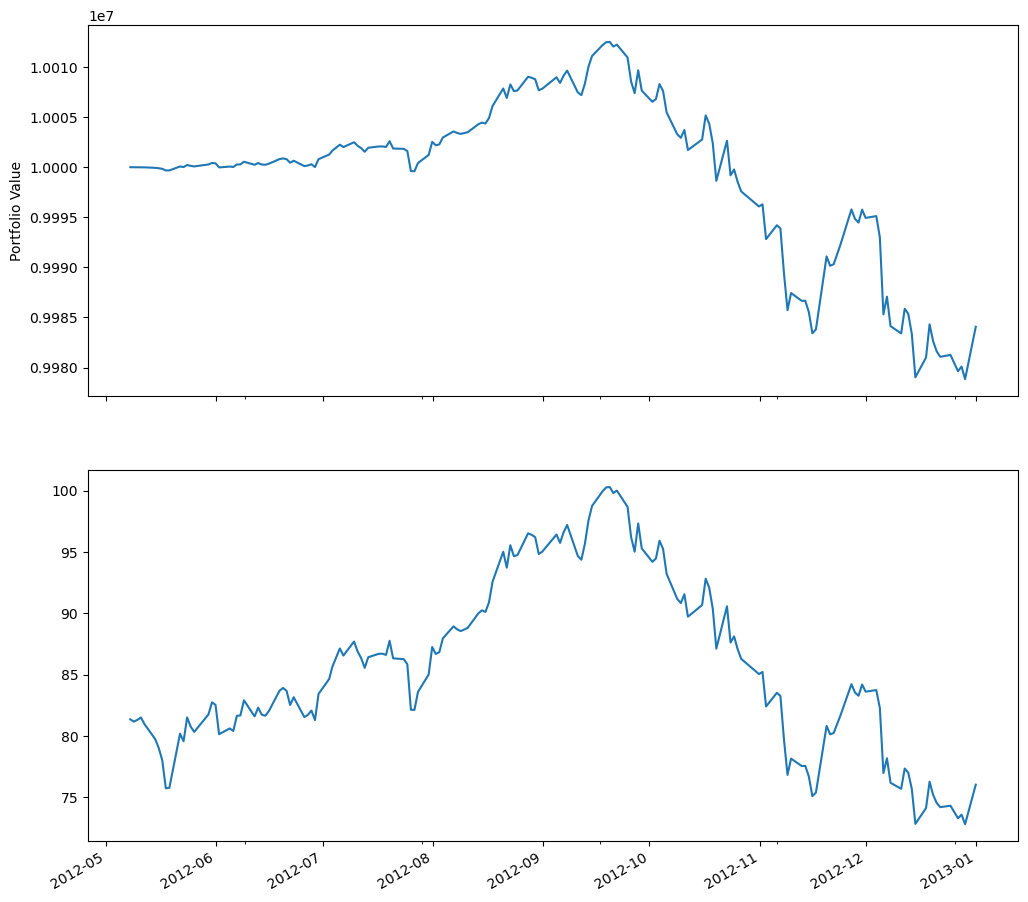

In [78]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
df.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('Portfolio Value')
ax2 = plt.subplot(212, sharex=ax1)
df.AAPL.plot(ax=ax2)

# Backtesting with Zipline - Single Factor

* Develop and test a simple mean-reversion factor.
* Measures how much recent performance deviates from historical average.
* What is short term reversal?
    * Short-term reversal states that
    * the weakly predictive pattern that stock price increases are likely to
    * mean-revert back down over horizons
        * from less than a minute to one month.

* zipline alpha factor research workflow in an offline environment.
* develop and test a simple mean-reversion factor that
    * measures how much recent performance has deviated from the historical average.
* the factor computes the z-score for the last monthly return relative to
    * the rolling monthly returns over the last year.
 
* After some basic settings, `MeanReversion` subclasses `CustomFactor` and defines a `compute()` method.
* It creates default inputs of monthly returns
    * over an also default year-long window so that
    * the `monthly_return` variable will have 252 rows and
    * one column for each security in the `Quandl` dataset on a given day.

* The `compute_factors()` method creates a `MeanReversion` factor instance
    * and creates long, short, and ranking pipeline columns.
* The former two contain Boolean values that could be used to place orders,
    * and the latter reflects that overall ranking to evaluate the overall factor performance.
* Furthermore, it uses the built-in `AverageDollarVolume` factor to limit the computation to more liquid stocks

* The result would allow us to place long and short orders. 
* We will see in the next chapter how to build a portfolio by choosing a rebalancing period and adjusting portfolio holdings as new signals arrive.

* The `initialize()` method registers the `compute_factors()` pipeline, and the `before_trading_start()` method ensures the pipeline runs on a daily basis.* 
The` record(`) function adds the pipeline's ranking column as well as the current asset prices to the performance DataFrame returned by the` run_algorithm(`) function

In [2]:
# Run using jupyter notebook extension
%load_ext zipline


* Using the `quandl` bundle instead of the default `quantopian-quandl` because the latter has a bug that requires (manually) fixing the SQL database. 
* If you have a file with benchmark returns you can provide this instead of `--no-benchmark`.

In [27]:
!zipline bundles

csvdir <no ingestions>
custom-csvdir-bundle 2024-06-15 00:16:24.384440
quandl 2024-04-29 23:38:44.959191
quandl 2024-04-29 23:38:16.860245
quandl 2024-04-29 23:35:11.639644
quantopian-quandl <no ingestions>


In [29]:
%%zipline --start 2015-1-1 --end 2018-1-1 --output single_factor.pickle --no-benchmark --bundle quandl

from zipline.api import (
    attach_pipeline,
    date_rules,
    time_rules,
    order_target_percent,
    pipeline_output,
    record,
    schedule_function,
    get_open_orders,
    calendars
)
from zipline.finance import commission, slippage
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.factors import Returns, AverageDollarVolume
import numpy as np
import pandas as pd

MONTH = 21
YEAR = 12 * MONTH
N_LONGS = N_SHORTS = 25
VOL_SCREEN = 1000

class MeanReversion(CustomFactor):
    """Compute ratio of latest monthly return to 12m average,
       normalized by std dev of monthly returns"""
    inputs = [Returns(window_length=MONTH)]
    window_length = YEAR

    def compute(self, today, assets, out, monthly_returns):
        df = pd.DataFrame(monthly_returns)
        out[:] = df.iloc[-1].sub(df.mean()).div(df.std())
        
def compute_factors():
    """Create factor pipeline incl. mean reversion,
        filtered by 30d Dollar Volume; 
        capture factor ranks
    """
    mean_reversion = MeanReversion()
    dollar_volume = AverageDollarVolume(window_length=30)
    return Pipeline(columns={'longs': mean_reversion.bottom(N_LONGS),
                             'shorts': mean_reversion.top(N_SHORTS),
                             'ranking': mean_reversion.rank(ascending=False)},
                    screen=dollar_volume.top(VOL_SCREEN))


def exec_trades(data, assets, target_percent):
    """Place orders for assets using target portfolio percentage"""
    for asset in assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            order_target_percent(asset, target_percent)


def rebalance(context, data):
    """Compute long, short and obsolete holdings; 
        place trade orders
    """
    factor_data = context.factor_data
    record(factor_data=factor_data.ranking)

    assets = factor_data.index
    record(prices=data.current(assets, 'price'))

    longs = assets[factor_data.longs]
    shorts = assets[factor_data.shorts]
    divest = set(context.portfolio.positions.keys()) - set(longs.union(shorts))

    exec_trades(data, assets=divest, target_percent=0)
    exec_trades(data, assets=longs, target_percent=1 / N_LONGS)
    exec_trades(data, assets=shorts, target_percent=-1 / N_SHORTS)

def initialize(context):
    """Setup: 
        - register pipeline, 
        - schedule rebalancing,
        - set trading params
    """
    
    attach_pipeline(compute_factors(), 'factor_pipeline')
    schedule_function(rebalance,
                      date_rules.week_start(),
                      time_rules.market_open(),
                      calendar=calendars.US_EQUITIES)
    context.set_commission(commission.PerShare(cost=.01, min_trade_cost=0))
    context.set_slippage(slippage.VolumeShareSlippage())


def before_trading_start(context, data):
    """Run factor pipeline"""
    context.factor_data = pipeline_output('factor_pipeline')

C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

,period_open,period_close,pnl,short_exposure,capital_used,orders,transactions,gross_leverage,positions,net_leverage,...,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algorithm_period_return,algo_volatility,factor_data,prices
2015-01-02 21:00:00+00:00,2015-01-02 14:31:00+00:00,2015-01-02 21:00:00+00:00,0.000000,0.000,0.000000e+00,[],[],0.000000,[],0.000000,...,0.000000,0.000000,0.0,0.0,1,2015-01,0.000000,NaN,NaN,NaN
2015-01-05 21:00:00+00:00,2015-01-05 14:31:00+00:00,2015-01-05 21:00:00+00:00,0.000000,0.000,0.000000e+00,"[{'id': '61794008c398484382179b1e4b54053f', 'd...",[],0.000000,[],0.000000,...,0.000000,0.000000,0.0,0.0,2,2015-01,0.000000,0.000000,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-06 21:00:00+00:00,2015-01-06 14:31:00+00:00,2015-01-06 21:00:00+00:00,-3799.475085,-1617262.705,-3.118062e+06,"[{'id': '61794008c398484382179b1e4b54053f', 'd...","[{'amount': 18433, 'dt': 2015-01-06 21:00:00+0...",0.635120,"[{'sid': Equity(749 [CVA]), 'amount': 18433, '...",0.311545,...,-0.000380,0.635120,0.0,0.0,3,2015-01,-0.000380,0.003482,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-07 21:00:00+00:00,2015-01-07 14:31:00+00:00,2015-01-07 21:00:00+00:00,12850.580000,-1629987.410,0.000000e+00,[],[],0.638131,"[{'sid': Equity(749 [CVA]), 'amount': 18433, '...",0.312429,...,-0.000380,0.638131,0.0,0.0,4,2015-01,0.000905,0.011564,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-08 21:00:00+00:00,2015-01-08 14:31:00+00:00,2015-01-08 21:00:00+00:00,63721.760000,-1645106.080,0.000000e+00,[],[],0.643422,"[{'sid': Equity(749 [CVA]), 'amount': 18433, '...",0.316778,...,-0.000380,0.643422,0.0,0.0,5,2015-01,0.007277,0.044725,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,-16960.030000,-4598653.320,0.000000e+00,[],[],0.895180,"[{'sid': Equity(672 [CPRT]), 'amount': -10147,...",0.060637,...,-0.142578,1.259576,0.0,0.0,751,2017-12,0.102076,0.090139,Equity(0 [A]) 2393.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.66 Equity(1 [AA]) ...
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,-43497.970000,-4592983.200,0.000000e+00,"[{'id': 'aa198fc26b7d468bac727193b459909f', 'd...",[],0.893732,"[{'sid': Equity(672 [CPRT]), 'amount': -10147,...",0.056914,...,-0.142578,1.259576,0.0,0.0,752,2017-12,0.097727,0.090110,Equity(0 [A]) 2363.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.25 Equity(1 [AA]) ...
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,41248.841483,-5240774.395,1.940099e+06,"[{'id': 'aa198fc26b7d468bac727193b459909f', 'd...","[{'amount': 10147, 'dt': 2017-12-27 21:00:00+0...",0.835635,"[{'sid': Equity(54 [ADSK]), 'amount': 4230, 'c...",-0.115631,...,-0.142578,1.259576,0.0,0.0,753,2017-12,0.101852,0.090074,Equity(0 [A]) 2363.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.25 Equity(1 [AA]) ...
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,25543.807669,-5158764.315,-5.744239e+04,"[{'id': '318c96372511429b9dfe225a6dc94723', 'd...","[{'amount': 2082, 'dt': 2017-12-28 21:00:00+00...",0.826365,"[{'sid': Equity(54 [ADSK]), 'amount': 4230, 'c...",-0.107850,...,-0.142578,1.259576,0.0,0.0,754,2017-12,0.104406,0.090023,Equity(0 [A]) 2363.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.25 Equity(1 [AA]) ...


In [30]:
df_single_factor = pd.read_pickle('single_factor.pickle')
df.shape

(1008, 2971)

In [33]:
df_single_factor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 21:00:00+00:00 to 2017-12-29 21:00:00+00:00
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              755 non-null    datetime64[ns, UTC]
 1   period_close             755 non-null    datetime64[ns, UTC]
 2   pnl                      755 non-null    float64            
 3   short_exposure           755 non-null    float64            
 4   capital_used             755 non-null    float64            
 5   orders                   755 non-null    object             
 6   transactions             755 non-null    object             
 7   gross_leverage           755 non-null    float64            
 8   positions                755 non-null    object             
 9   net_leverage             755 non-null    float64            
 10  starting_exposure        755 non-null    float64 

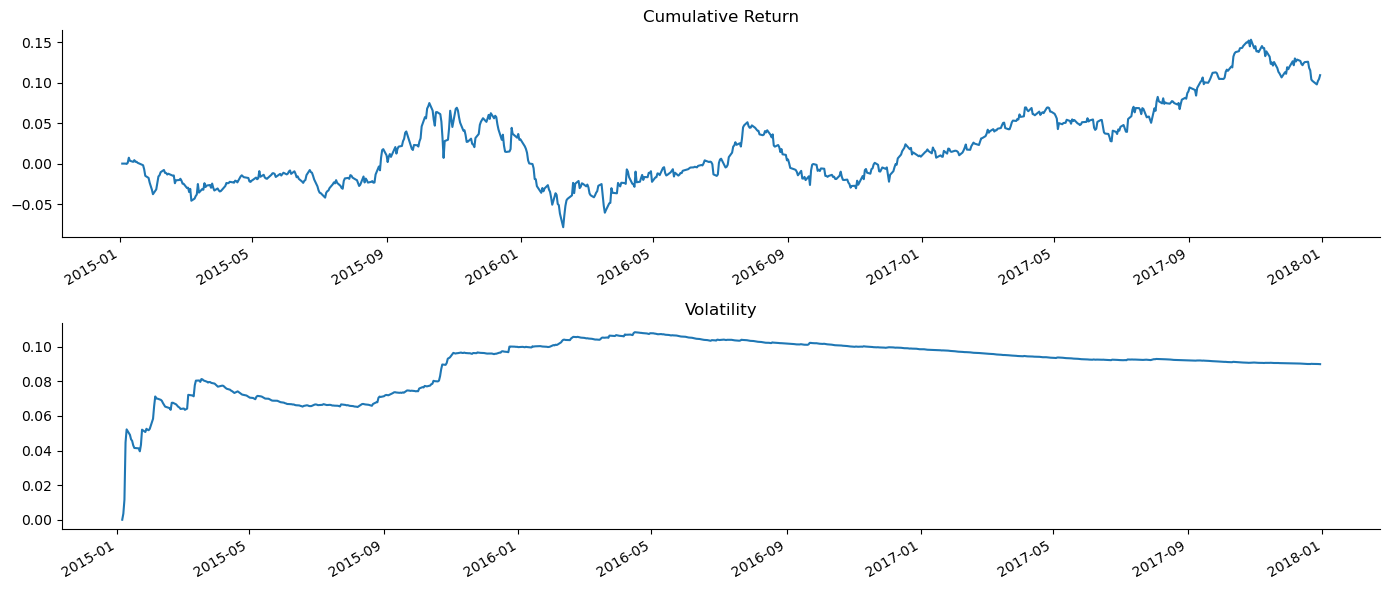

In [36]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, figsize=(14,6))
df_single_factor.algorithm_period_return.plot(ax=axes[0], title='Cumulative Return')
df_single_factor.algo_volatility.plot(ax=axes[1], title='Volatility')
sns.despine()
fig.tight_layout();

In [37]:
import re
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.performance import *
from alphalens.plotting import *
from alphalens.tears import *

import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
sns.set_style('whitegrid')

In [39]:
df_single_factor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 21:00:00+00:00 to 2017-12-29 21:00:00+00:00
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              755 non-null    datetime64[ns, UTC]
 1   period_close             755 non-null    datetime64[ns, UTC]
 2   pnl                      755 non-null    float64            
 3   short_exposure           755 non-null    float64            
 4   capital_used             755 non-null    float64            
 5   orders                   755 non-null    object             
 6   transactions             755 non-null    object             
 7   gross_leverage           755 non-null    float64            
 8   positions                755 non-null    object             
 9   net_leverage             755 non-null    float64            
 10  starting_exposure        755 non-null    float64 

In [40]:
df_single_factor.head()

,period_open,period_close,pnl,short_exposure,capital_used,orders,transactions,gross_leverage,positions,net_leverage,...,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algorithm_period_return,algo_volatility,factor_data,prices
2015-01-02 21:00:00+00:00,2015-01-02 14:31:00+00:00,2015-01-02 21:00:00+00:00,0.000000,0.000,0.000000e+00,[],[],0.000000,[],0.000000,...,0.00000,0.000000,0.0,0.0,1,2015-01,0.000000,NaN,NaN,NaN
2015-01-05 21:00:00+00:00,2015-01-05 14:31:00+00:00,2015-01-05 21:00:00+00:00,0.000000,0.000,0.000000e+00,"[{'id': '61794008c398484382179b1e4b54053f', 'd...",[],0.000000,[],0.000000,...,0.00000,0.000000,0.0,0.0,2,2015-01,0.000000,0.000000,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-06 21:00:00+00:00,2015-01-06 14:31:00+00:00,2015-01-06 21:00:00+00:00,-3799.475085,-1617262.705,-3.118062e+06,"[{'id': '61794008c398484382179b1e4b54053f', 'd...","[{'amount': 18433, 'dt': 2015-01-06 21:00:00+0...",0.635120,"[{'sid': Equity(749 [CVA]), 'amount': 18433, '...",0.311545,...,-0.00038,0.635120,0.0,0.0,3,2015-01,-0.000380,0.003482,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-07 21:00:00+00:00,2015-01-07 14:31:00+00:00,2015-01-07 21:00:00+00:00,12850.580000,-1629987.410,0.000000e+00,[],[],0.638131,"[{'sid': Equity(749 [CVA]), 'amount': 18433, '...",0.312429,...,-0.00038,0.638131,0.0,0.0,4,2015-01,0.000905,0.011564,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-08 21:00:00+00:00,2015-01-08 14:31:00+00:00,2015-01-08 21:00:00+00:00,63721.760000,-1645106.080,0.000000e+00,[],[],0.643422,"[{'sid': Equity(749 [CVA]), 'amount': 18433, '...",0.316778,...,-0.00038,0.643422,0.0,0.0,5,2015-01,0.007277,0.044725,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...


In [41]:
prices = pd.concat([df.to_frame(d) for d, df in df_single_factor.prices.dropna().items()],axis=1).T
prices.columns = [re.findall(r"\[(.+)\]", str(col))[0] for col in prices.columns]
prices.index = prices.index.normalize()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-01-05 00:00:00+00:00 to 2017-12-29 00:00:00+00:00
Columns: 1649 entries, A to NETE
dtypes: float64(1649)
memory usage: 9.5 MB
